In [1]:
import Quandl
%pylab inline
#import matplotlib.pyplot as plt
import datetime
import pandas as pd
import matplotlib as mpl

from pandas_datareader import data, wb

mpl.style.use(['dark_background'])
mpl.rc('figure', figsize=(15, 11))


myAuthToken = "uUfmVoEksfwWxMA4tQcd"




Populating the interactive namespace from numpy and matplotlib


In [3]:

#stockList = ['AAPL', 'AXP', 'BA','CAT','CSCO','CVX','DD', 'DIS','GE', 'GS', 'HD', 'IBM','INT', 'JNJ', 'JPM' ,'KO', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UNH', 'UTX', 'V', 'VZ', 'WMT', 'XOM']
stockList = ['^IXIC']
#sp500ShortList         sp500List
start = "2013-07-01"
end = "2016-02-02"
             
source = 'yahoo'
temp = web.DataReader(stockList[0], source,start, end)

df = pd.DataFrame(index=temp.index, columns=stockList)

for x in range(len(stockList)):
    temp = web.DataReader(stockList[x], source,start, end)
    #temp['Return'] = temp['Adj Close'].pct_change()
    temp['Return']= np.log(temp['Adj Close'] / temp['Adj Close'].shift(1))
    temp['cumReturn'] = temp['Return'].cumsum()
    df[stockList[x]] = temp['cumReturn']
    
#data['Return'] = np.log(mydata['Settle'] / mydata['Settle'].shift(1))


df.tail(1)

AttributeError: 'module' object has no attribute 'DataReader'

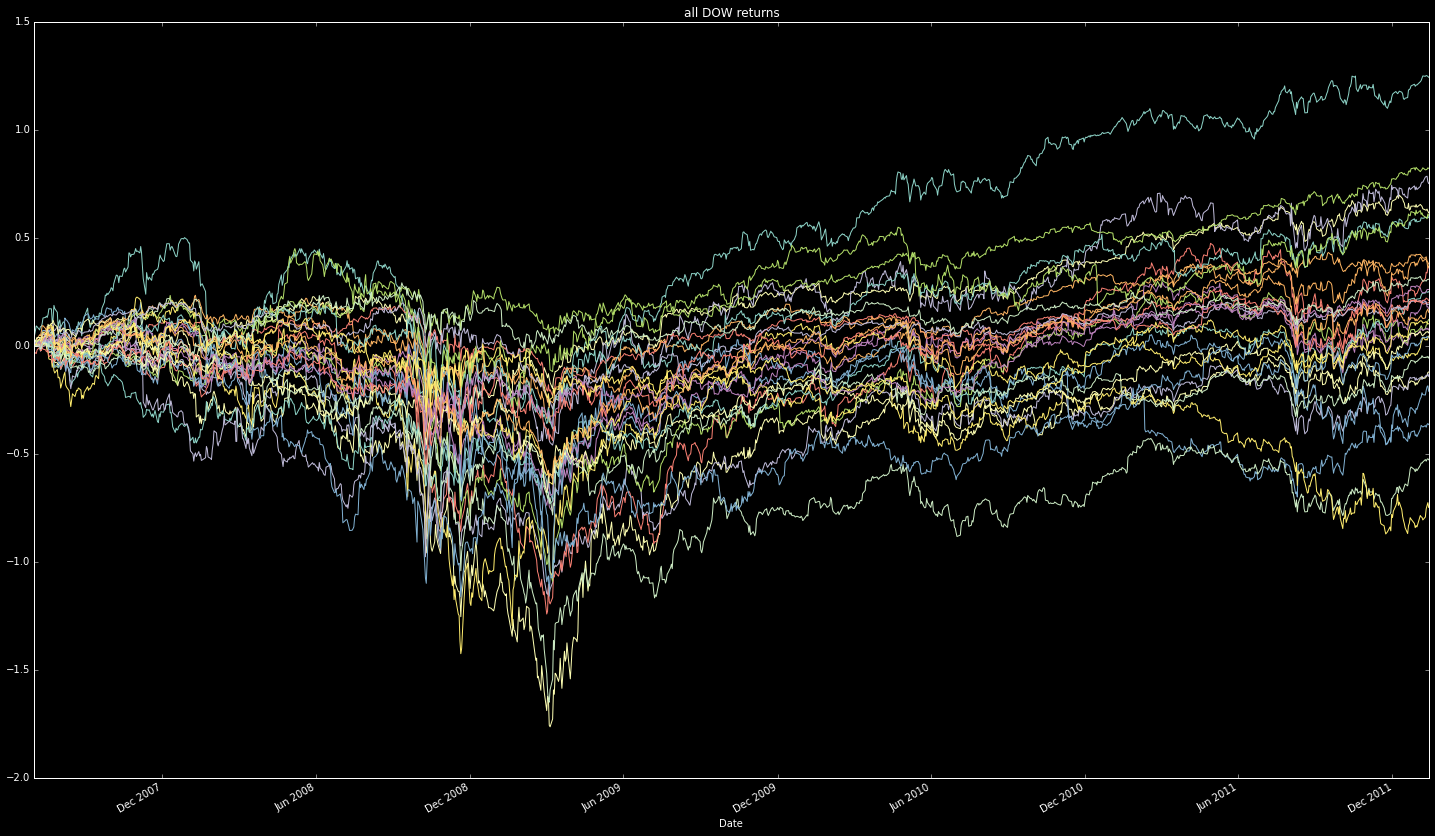

In [39]:


mpl.rc('figure', figsize=(25, 15))
df.plot(legend=None, title='all DOW returns')

In [40]:
new_columns = df.columns[df.ix[df.last_valid_index()].argsort()]
sortedDF = df[new_columns]

In [41]:
tailDFsorted = sortedDF.tail(1)

In [42]:
tailDFsorted

,GS,GE,CSCO,JPM,BA,AXP,MRK,UNH,MSFT,PFE,...,WMT,CAT,CVX,KO,NKE,V,IBM,INT,MCD,AAPL
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-13,-0.749895,-0.529079,-0.366108,-0.211873,-0.143008,-0.122644,-0.057821,0.036588,0.0437,0.058505,...,0.306694,0.364044,0.368851,0.376398,0.591934,0.602924,0.61414,0.750023,0.820297,1.241865
